In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df = pd.read_csv('/content/drive/MyDrive/bank customer churn Ml project/Churn Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
df.shape

(10000, 14)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [79]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [80]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [81]:
df.mean()

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [82]:
df.value_counts()

RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
10000      15628319    Walker      792          France     Female  28   4       130142.79  1              1          0               38190.78         0         1
3330       15684925    Vicars      850          France     Female  43   3       0.00       2              0          0               2465.80          0         1
3337       15671390    Chukwukere  690          Spain      Male    36   10      0.00       2              1          0               55902.93         0         1
3336       15660735    T'ang       581          Spain      Female  31   6       0.00       2              1          0               188377.21        0         1
3335       15702300    Walker      671          France     Male    27   5       0.00       2              0          0               120893.07        0         1
                                 

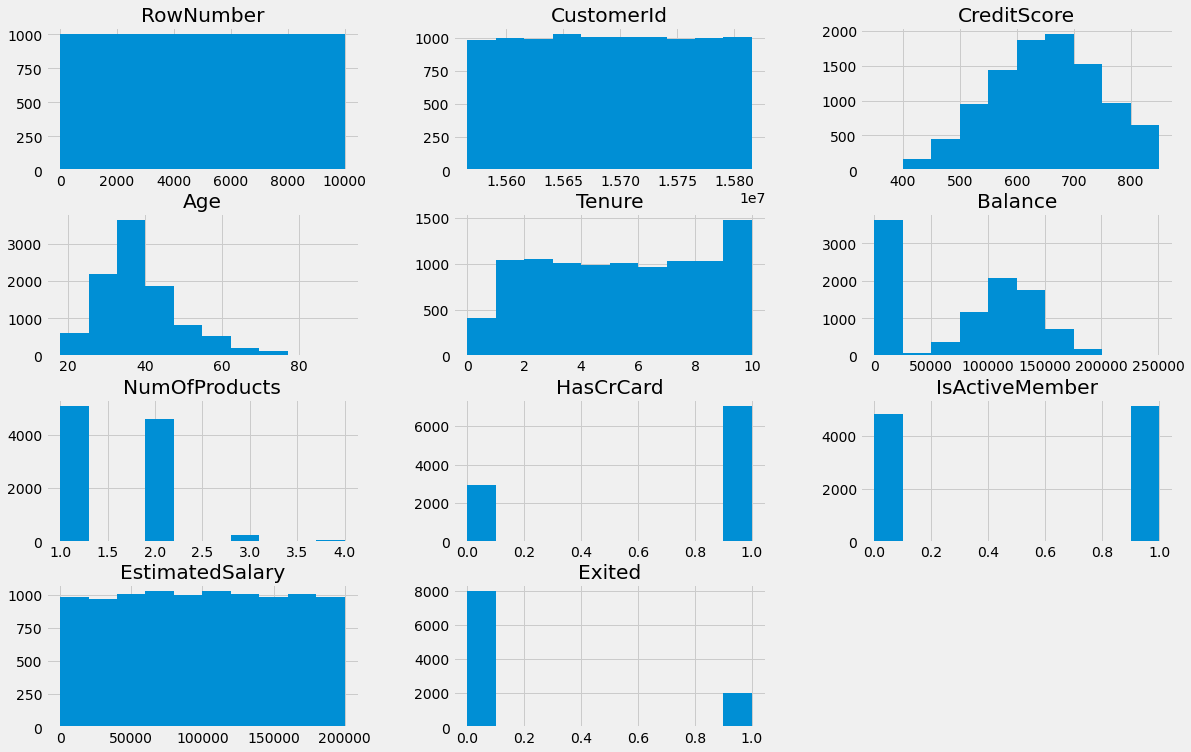

In [83]:
df.hist(figsize=(18,12))
plt.show()

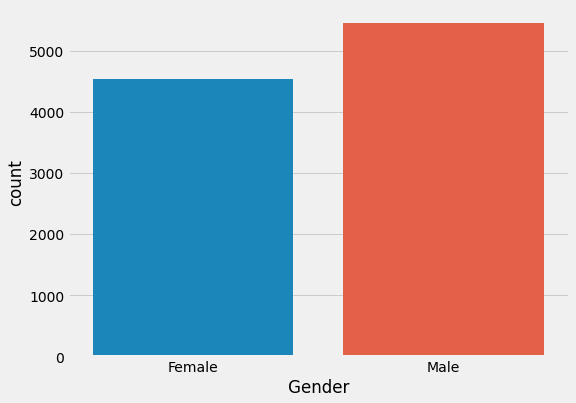

In [84]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Gender', data = df)
plt.show()

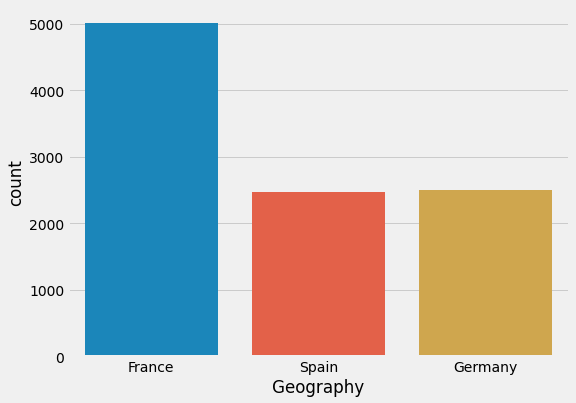

In [85]:
plt.figure(figsize=(8,6))
sns.countplot(df['Geography'])
plt.show()

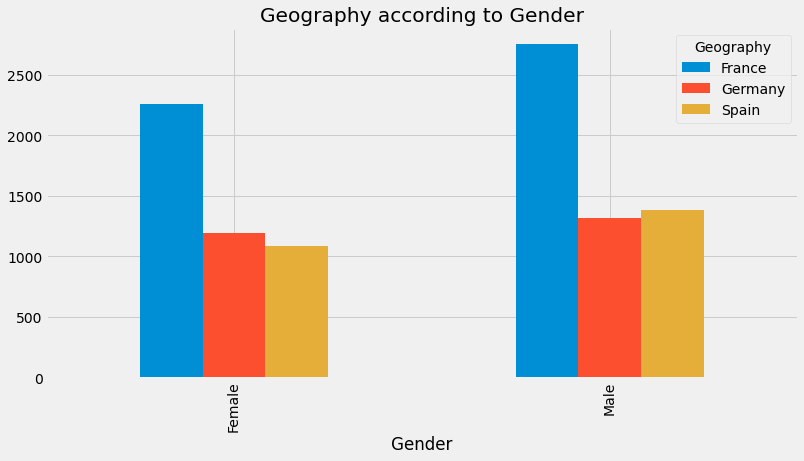

In [86]:
pd.crosstab(df['Gender'],df['Geography']).plot(kind = 'bar', figsize = (12,6))
plt.title('Geography according to Gender')
plt.show()

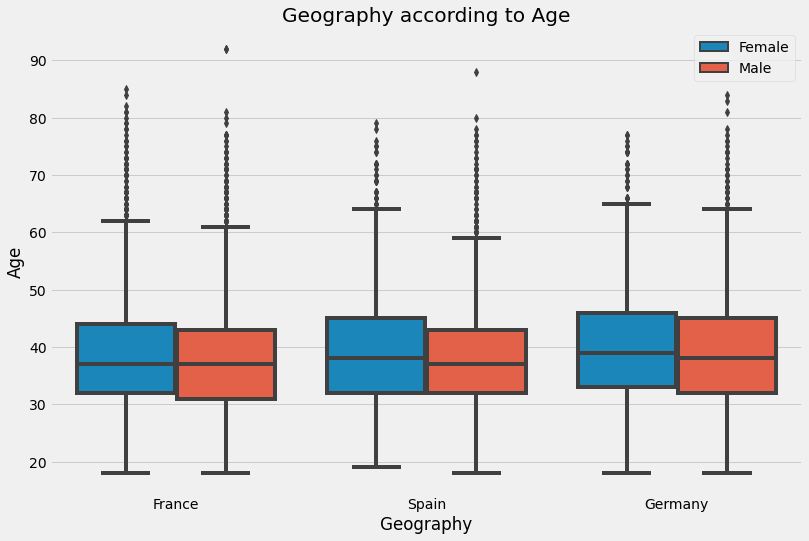

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Geography', y = 'Age', hue ='Gender', data = df)
plt.title('Geography according to Age')
plt.legend(loc = 'upperright')
plt.show()

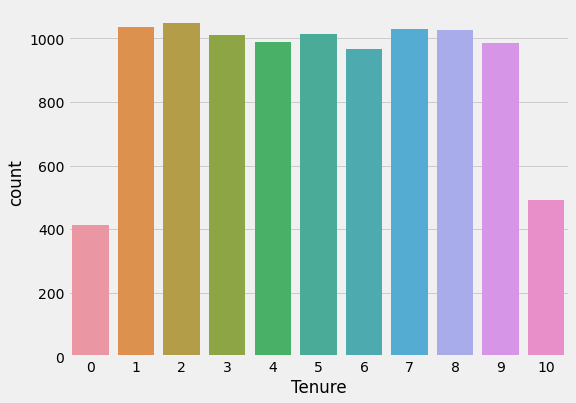

In [88]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Tenure', data = df)
plt.show()

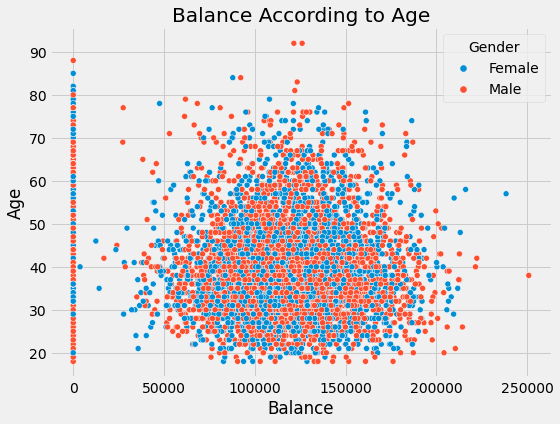

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Balance', y ='Age', hue = 'Gender', data = df)
plt.title('Balance According to Age')
plt.show()

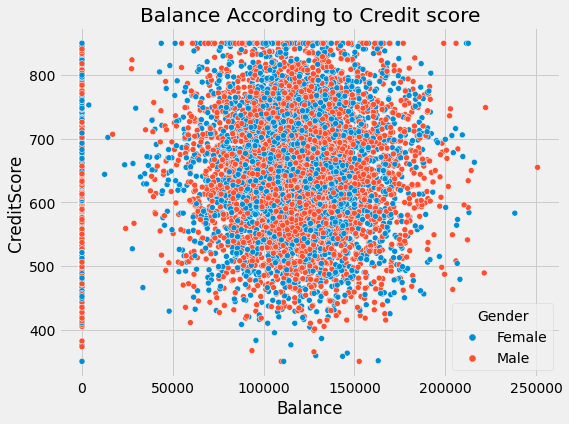

In [90]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Balance', y ='CreditScore', hue = 'Gender', data = df)
plt.title('Balance According to Credit score')
plt.show()

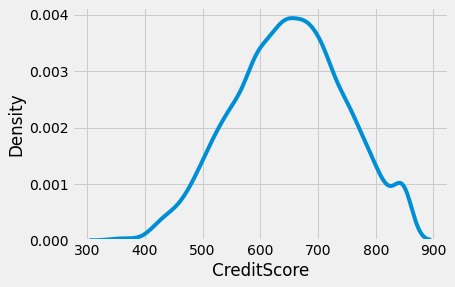

In [91]:
sns.kdeplot(x = 'CreditScore', data = df)
plt.show()

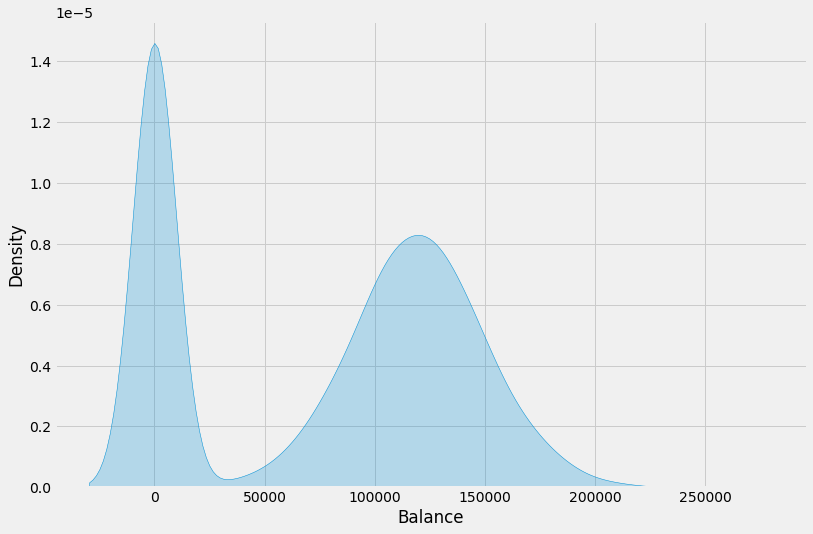

In [92]:
plt.figure(figsize = (12,8))
sns.kdeplot(x = 'Balance', shade = True,data = df)
plt.show()

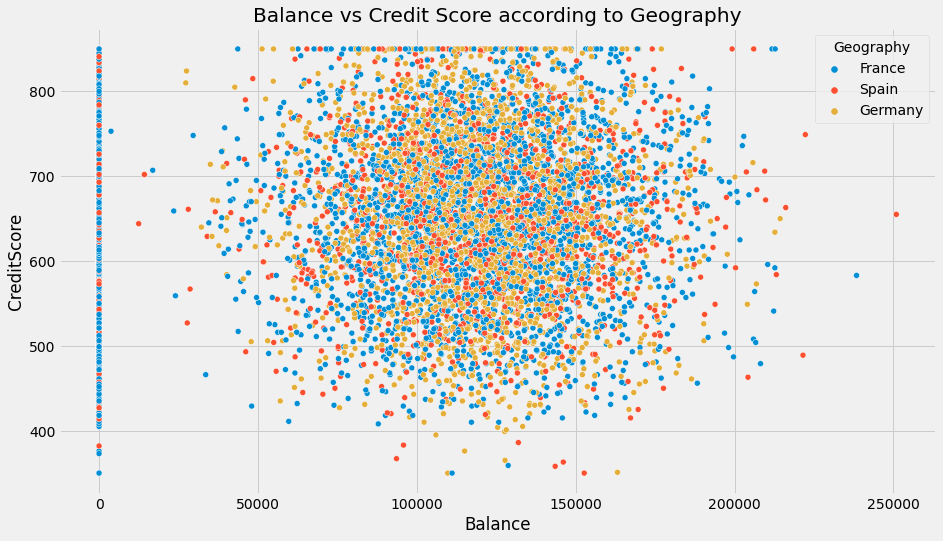

In [93]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'Balance', y = 'CreditScore', hue = 'Geography' ,data = df)
plt.title('Balance vs Credit Score according to Geography')
plt.show()

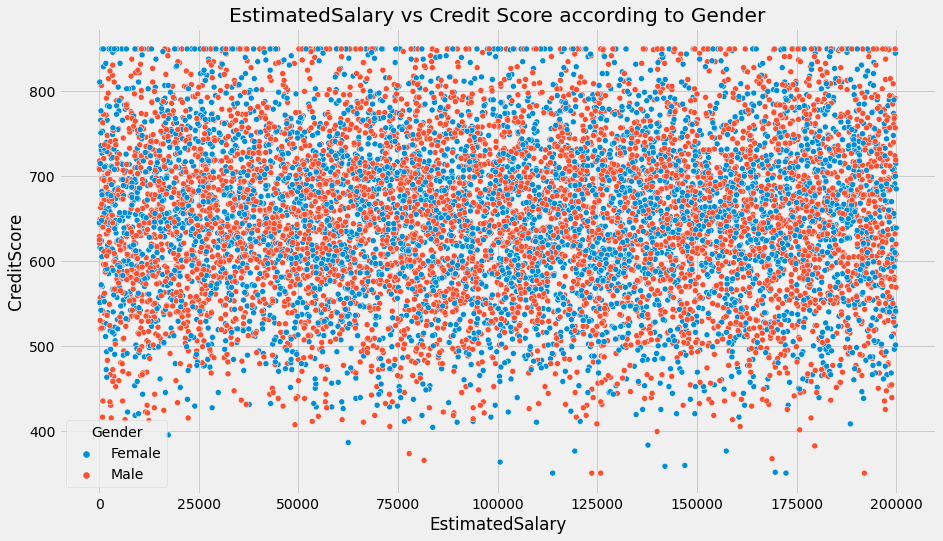

In [94]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'EstimatedSalary', y = 'CreditScore', hue = 'Gender' ,data = df)
plt.title('EstimatedSalary vs Credit Score according to Gender')
plt.show()

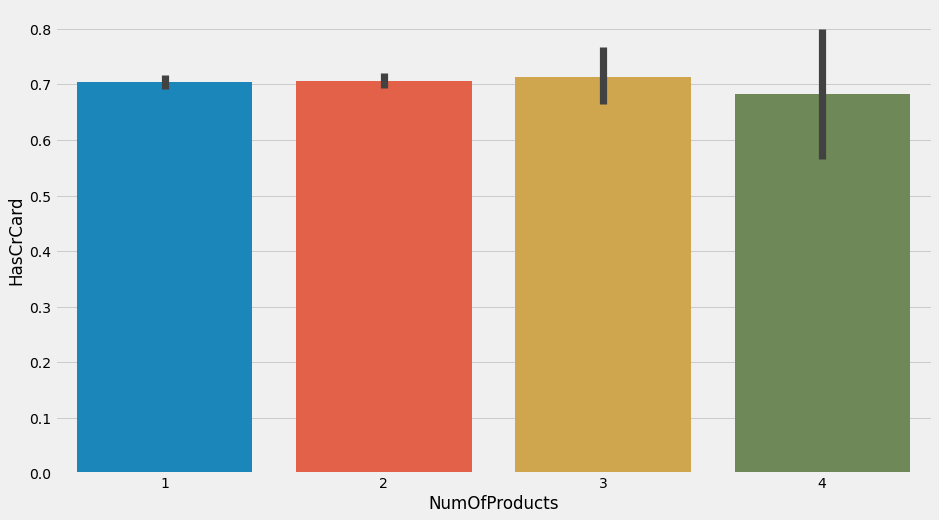

In [95]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'NumOfProducts', y = 'HasCrCard', data = df)
plt.show()

In [96]:
list_1 = list(df.columns)

In [97]:
list_cate = []
for i in list_1:
  if df[i].dtype == 'object':
    list_cate.append(i)

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le = LabelEncoder()
for i in list_cate:
  df[i] = le.fit_transform(df[i])

In [100]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [103]:
X = df.drop('Geography', axis=1)
y = df['Geography']

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [107]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# ANN

In [108]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [110]:
model = Sequential()

model.add(Dense(activation = 'relu', units=6, kernel_initializer = 'uniform'))
model.add(Dense(activation = 'relu', input_dim = 11, units = 6, kernel_initializer='uniform'))
model.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer= 'uniform'))

In [111]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [112]:
model.fit(X_train, y_train, batch_size = 10, epochs = 200)  

Epoch 1/200
800/800 [==============================] - 5s 2ms/step - loss: 0.5816 - accuracy: 0.2529
Epoch 2/200
800/800 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.2525
Epoch 3/200
800/800 [==============================] - 2s 2ms/step - loss: 0.5464 - accuracy: 0.2525
Epoch 4/200
800/800 [==============================] - 2s 3ms/step - loss: 0.5454 - accuracy: 0.2525
Epoch 5/200
800/800 [==============================] - 2s 2ms/step - loss: 0.5450 - accuracy: 0.2525
Epoch 6/200
800/800 [==============================] - 2s 2ms/step - loss: 0.5442 - accuracy: 0.2525
Epoch 7/200
800/800 [==============================] - 2s 2ms/step - loss: 0.5445 - accuracy: 0.2525
Epoch 8/200
800/800 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.2525
Epoch 9/200
800/800 [==============================] - 2s 2ms/step - loss: 0.5439 - accuracy: 0.2525
Epoch 10/200
800/800 [==============================] - 2s 2ms/step - loss: 0.5441 - accura

In [113]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (10, 6)                   84        
_________________________________________________________________
dense_1 (Dense)              (10, 6)                   42        
_________________________________________________________________
dense_2 (Dense)              (10, 1)                   7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [115]:
y_pred = model.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [116]:
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))

Mean squared error:  0.6757483325365395
Mean absolute error:  0.7279475114196539


In [117]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.2445


[0.6099088788032532, 0.24449999630451202]

In [123]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.2445


[0.6099088788032532, 0.24449999630451202]